<a href="https://colab.research.google.com/github/reallygooday/60daysofudacity/blob/master/DL_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1f-KMnZiOX_jcfbFY9V-YFHpWtiyu7V_r#scrollTo=MqQvOZimcq8Z

In [33]:
!pip install torch

In [34]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-08-18 13:56:39--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
# First, import PyTorch
import torch

In [0]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [0]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [0]:
# Now, make our labels from our data and true weights

y = activation(torch.sum(features * weights) + bias)
y = activation((features * weights).sum() + bias)

In [0]:
y = activation(torch.mm(features, weights.view(5,1)) + bias)

In [0]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [41]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

tensor([[0.3171]])


In [42]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.83858721, 0.56103606, 0.52584731],
       [0.36442927, 0.64755189, 0.61519716],
       [0.6766391 , 0.31469385, 0.76637383],
       [0.19673277, 0.71593399, 0.52863008]])

In [43]:
b = torch.from_numpy(a)
b

tensor([[0.8386, 0.5610, 0.5258],
        [0.3644, 0.6476, 0.6152],
        [0.6766, 0.3147, 0.7664],
        [0.1967, 0.7159, 0.5286]], dtype=torch.float64)

In [44]:
b.numpy()

array([[0.83858721, 0.56103606, 0.52584731],
       [0.36442927, 0.64755189, 0.61519716],
       [0.6766391 , 0.31469385, 0.76637383],
       [0.19673277, 0.71593399, 0.52863008]])

In [45]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[1.6772, 1.1221, 1.0517],
        [0.7289, 1.2951, 1.2304],
        [1.3533, 0.6294, 1.5327],
        [0.3935, 1.4319, 1.0573]], dtype=torch.float64)

In [46]:
# Numpy array matches new values from Tensor
a

array([[1.67717443, 1.12207211, 1.05169463],
       [0.72885854, 1.29510379, 1.23039433],
       [1.3532782 , 0.6293877 , 1.53274767],
       [0.39346555, 1.43186797, 1.05726017]])

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [49]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


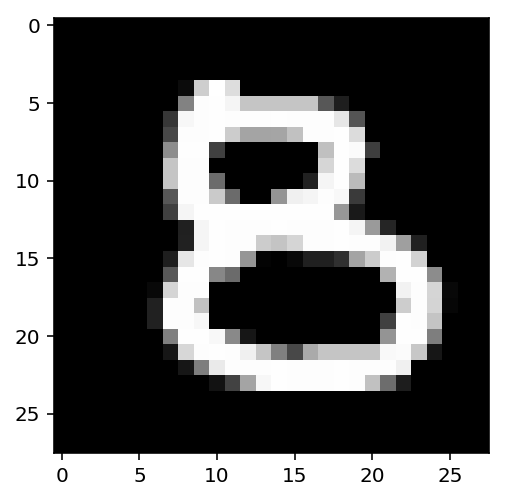

In [50]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [52]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [55]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [57]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [58]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0033, -0.0026, -0.0164,  ..., -0.0308,  0.0194,  0.0055],
        [-0.0038,  0.0220,  0.0195,  ...,  0.0263, -0.0158,  0.0255],
        [-0.0271,  0.0259, -0.0018,  ..., -0.0255, -0.0197,  0.0196],
        ...,
        [-0.0226, -0.0048, -0.0072,  ..., -0.0170,  0.0275, -0.0274],
        [-0.0028,  0.0030,  0.0137,  ..., -0.0046, -0.0090,  0.0115],
        [-0.0302,  0.0081, -0.0323,  ..., -0.0194, -0.0074,  0.0023]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0167,  0.0271,  0.0063, -0.0016,  0.0206, -0.0016,  0.0036, -0.0076,
         0.0105, -0.0310, -0.0025, -0.0094,  0.0347, -0.0294, -0.0061,  0.0052,
         0.0052,  0.0115,  0.0229, -0.0134, -0.0010,  0.0006, -0.0315,  0.0100,
        -0.0288,  0.0176,  0.0343,  0.0254, -0.0033,  0.0076, -0.0077, -0.0086,
         0.0209, -0.0210,  0.0286,  0.0117, -0.0188,  0.0013, -0.0105, -0.0211,
         0.0009,  0.0022, -0.0245,  0.0222, -0.0050, -0.0263, -0.0247, -0.0289,
         0.0260

In [59]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-1.8894e-03, -1.0166e-02,  6.4258e-03,  ...,  6.9197e-03,
          3.6752e-03,  1.4070e-02],
        [-7.7408e-03,  5.9104e-03,  2.5856e-03,  ..., -8.1237e-03,
          9.8138e-05,  1.1175e-02],
        [ 8.8960e-03, -6.4789e-03,  1.5649e-02,  ...,  2.7435e-04,
         -7.3366e-03,  2.2125e-02],
        ...,
        [-3.7657e-03,  4.1685e-03,  7.7986e-03,  ..., -1.6920e-02,
          8.5150e-04, -5.2015e-03],
        [ 4.2577e-03, -1.6907e-03, -5.5836e-04,  ..., -1.1571e-02,
          1.2550e-02,  1.4432e-02],
        [ 1.3073e-02,  8.6931e-03,  8.6083e-03,  ...,  9.8246e-03,
         -1.2997e-02,  1.3015e-02]])

In [61]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2019-08-18 13:56:41--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-08-18 13:56:42 (62.5 MB/s) - ‘helper.py.1’ saved [2813/2813]



In [0]:
import helper

In [66]:
!pip install helper

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [71]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


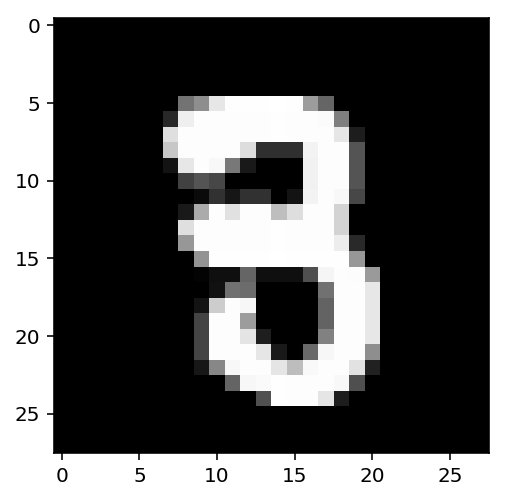

In [72]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:

def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [74]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [78]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [80]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [81]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0093,  0.0029,  0.0322,  ..., -0.0284, -0.0343,  0.0112],
        [-0.0308,  0.0314, -0.0278,  ..., -0.0071,  0.0089,  0.0219],
        [ 0.0037, -0.0303,  0.0230,  ...,  0.0200,  0.0005,  0.0040],
        ...,
        [ 0.0356,  0.0227, -0.0079,  ..., -0.0052, -0.0092,  0.0061],
        [ 0.0100, -0.0112, -0.0139,  ...,  0.0255,  0.0052, -0.0351],
        [ 0.0316,  0.0069, -0.0158,  ..., -0.0059, -0.0281,  0.0041]],
       requires_grad=True)
Parameter containing:
tensor([-3.4584e-02,  2.1845e-02,  2.3698e-02,  2.5773e-02,  1.4807e-02,
        -8.8689e-03,  1.9224e-02,  3.0629e-02, -1.9890e-02, -1.7149e-02,
        -2.3341e-02,  2.5841e-02, -1.6375e-02,  1.7155e-02, -2.5435e-02,
        -1.0771e-02,  3.2316e-02,  2.6441e-03, -1.0128e-02,  3.1178e-03,
        -2.8859e-02,  6.1222e-03, -2.5705e-02, -1.9098e-02,  1.8543e-02,
        -2.2745e-02,  2.8086e-02,  2.6313e-02, -3.5679e-02, -2.7918e-02,
         1.5682e-02, -8.8185e-03, -6.1437e-03,  3.2722e-0

In [0]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

In [82]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0170, -0.0060, -0.0104,  ..., -0.0016, -0.0158,  0.0010],
        [-0.0110, -0.0128, -0.0012,  ...,  0.0174,  0.0058,  0.0134],
        [-0.0017, -0.0019,  0.0175,  ...,  0.0030,  0.0019, -0.0208],
        ...,
        [ 0.0023, -0.0018,  0.0098,  ...,  0.0077,  0.0097,  0.0075],
        [-0.0022,  0.0101, -0.0124,  ..., -0.0038, -0.0033, -0.0004],
        [-0.0026, -0.0066,  0.0015,  ..., -0.0038, -0.0111,  0.0019]])

In [84]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

AttributeError: ignored